In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plot
import math
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score

In [671]:
df= pd.read_csv("Train.csv")
df.head(10)

,TimeStamp,StandardTemperature,Humidity,Wind,Ticket1,Ticket2
0,2068-04-18 03:00:00,0.284836,47.75442,0.221554,1,3
1,2068-05-20 19:00:00,0.614588,48.72900,0.413520,108,233
2,2067-06-10 21:00:00,0.614588,28.26282,0.103405,52,197
3,2067-01-08 02:00:00,0.269797,77.96640,0.000000,6,28
4,2067-08-07 00:00:00,0.689581,53.60190,0.088661,34,81
5,2068-02-27 22:00:00,0.314813,43.85610,0.088661,10,54
6,2067-08-06 00:00:00,0.689581,53.60190,0.191967,61,74
7,2068-05-01 14:00:00,0.479640,24.36450,0.384033,51,167
8,2067-06-12 20:00:00,0.614588,67.24602,0.191967,85,196
9,2067-01-18 19:00:00,0.224881,90.63594,0.000000,1,52


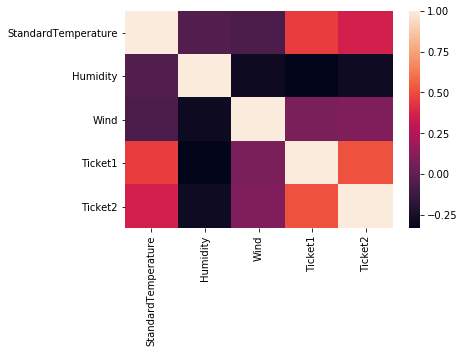

In [680]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

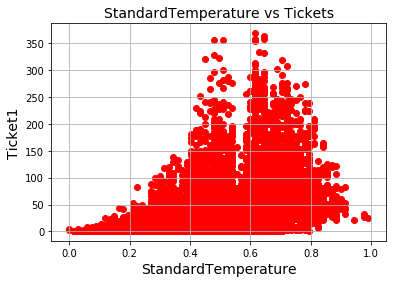

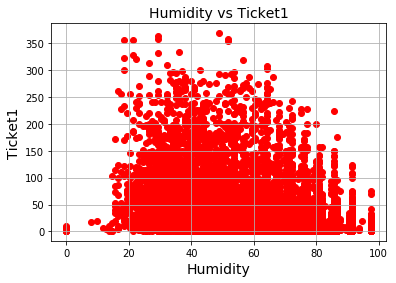

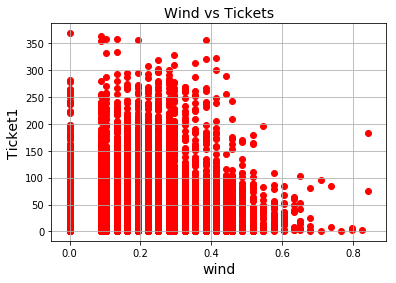

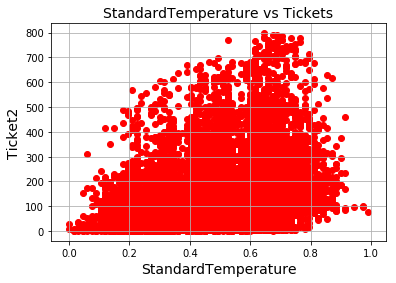

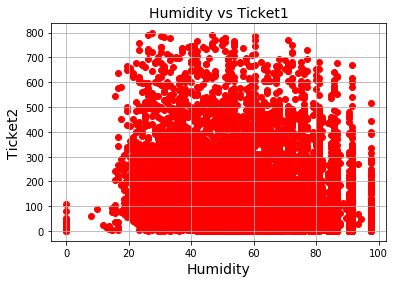

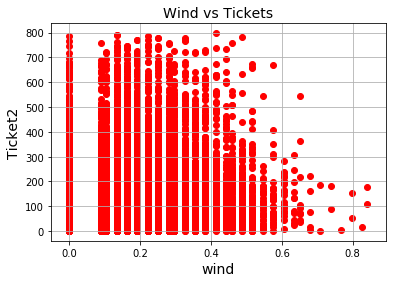

In [675]:
# Plots on Data Analysis
plt.scatter(df['StandardTemperature'], df['Ticket1'], color='red')
plt.title('StandardTemperature vs Ticket1', fontsize=14)
plt.xlabel('StandardTemperature', fontsize=14)
plt.ylabel('Ticket1', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Humidity'], df['Ticket1'], color='red')
plt.title('Humidity vs Ticket1', fontsize=14)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Ticket1', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Wind'], df['Ticket1'], color='red')
plt.title('Wind vs Ticket1', fontsize=14)
plt.xlabel('wind', fontsize=14)
plt.ylabel('Ticket1', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['StandardTemperature'], df['Ticket2'], color='red')
plt.title('StandardTemperature vs Ticket2', fontsize=14)
plt.xlabel('StandardTemperature', fontsize=14)
plt.ylabel('Ticket2', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Humidity'], df['Ticket2'], color='red')
plt.title('Humidity vs Ticket2', fontsize=14)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Ticket2', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Wind'], df['Ticket2'], color='red')
plt.title('Wind vs Ticket2', fontsize=14)
plt.xlabel('wind', fontsize=14)
plt.ylabel('Ticket2', fontsize=14)
plt.grid(True)
plt.show()

In [661]:
#dividing the data into train and validate

X= df[['StandardTemperature','Humidity','Wind']]
Y= df[['Ticket1','Ticket2']]
train_x,valid_x, train_y, valid_y = sklearn.model_selection.train_test_split(X,Y, random_state= 40, test_size= 0.2)

In [662]:
#Importing Test Data

df1= pd.read_csv("Test.csv")
df1.head(10)
test_x= df1[['StandardTemperature','Humidity','Wind']]

# Linear Model

In [663]:
# Fitting a linear model

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regr = linear_model.LinearRegression()
# model=regr.fit(X, Y)
model=regr.fit(train_x, train_y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 [ 21.88693486 112.09789975]
Coefficients: 
 [[120.842256    -0.74871685   6.99706375]
 [275.80047672  -1.81442866  54.56497169]]


In [664]:
pred_lr= model.predict(valid_x)
pred_lr

array([[  2.63051149,  59.81097974],
       [ 36.39617016, 146.63602275],
       [ 60.29127222, 198.02403935],
       ...,
       [ 36.56710919, 148.5952631 ],
       [ 44.72513523, 161.11046594],
       [ 11.68670299,  84.36811271]])

In [665]:
print('rmse= ',math.sqrt(sklearn.metrics.mean_squared_error(pred, valid_y)))
print('r^2=', r2_score(valid_y, pred))

rmse=  88.41879201746518
r^2= 0.2617740522930406


# Plynomial Regression 

In [666]:
# Fitting polynomial regression model
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(train_x)
predict_ = poly.fit_transform(valid_x)

clf = linear_model.LinearRegression()
clf.fit(X_, train_y)

#test case
# poly = PolynomialFeatures(degree=4)
# X_ = poly.fit_transform(X)
# predict_ = poly.fit_transform(test_x)

# clf = linear_model.LinearRegression()
# clf.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [668]:
pred_poly=clf.predict(predict_)

In [669]:
print('rmse= ',math.sqrt(sklearn.metrics.mean_squared_error(pred_poly, valid_y)))
print('r^2=', r2_score(valid_y, pred_poly))
valid_y.head(5)

rmse=  87.1489236948856
r^2= 0.2921045972370151


,Ticket1,Ticket2
4959,5,52
10945,31,72
12171,69,398
1552,72,336
654,24,59


In [650]:
pred_lr[0:10]

array([[ 41.06353009, 148.64817181],
       [ 22.85950655, 106.06334257],
       [ 30.87930999, 127.04204985],
       [ 51.93348583, 189.28668243],
       [ 38.97923303, 153.99383072],
       [ 13.03417416,  89.21613717],
       [  6.08443245,  68.05552793],
       [ 68.22878687, 221.72830502],
       [ 28.30291394, 123.72977984],
       [ 31.44307594, 133.32842842]])

In [649]:
pred_poly[0:10]

array([[ 32.80822975, 131.91911342],
       [ 20.11512528, 107.07996156],
       [ 23.04010625, 115.76061888],
       [ 49.50662302, 179.9403182 ],
       [ 36.69125632, 158.5704819 ],
       [ 12.85345218,  78.34500179],
       [ 12.55045622,  89.78211123],
       [ 86.29643861, 260.30021336],
       [ 26.19816716, 125.67526183],
       [ 26.70648926, 130.15957483]])

In [655]:
final=pd.DataFrame(data=pred_poly)
final.columns=['Ticket1','Ticket2']
final['Ticket1'].astype(int)
final['Ticket2'].astype(int)
final=final.round()
final

,Ticket1,Ticket2
0,33.0,132.0
1,20.0,107.0
2,23.0,116.0
3,50.0,180.0
4,37.0,159.0
5,13.0,78.0
6,13.0,90.0
7,86.0,260.0
8,26.0,126.0
9,27.0,130.0


In [656]:
#output
final.to_csv('A.csv',index=False)